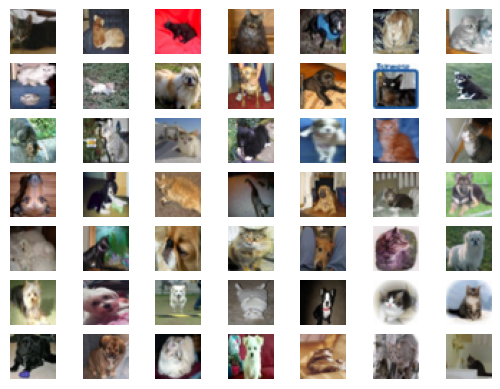

In [1]:
from keras.datasets.cifar10 import load_data
from matplotlib import pyplot
#load the image into the memory
(trainX, trainy), (textX, testy) = load_data()
trainX = trainX[(trainy.ravel() == 3) | (trainy.ravel() == 5) ] 

#plot the images from the training set
for i in range(49):
	pyplot.subplot(7,7,1+i)
	#turn of axis
	pyplot.axis('off')
	#plot raw pixel data
	pyplot.imshow(trainX[i])
pyplot.show()

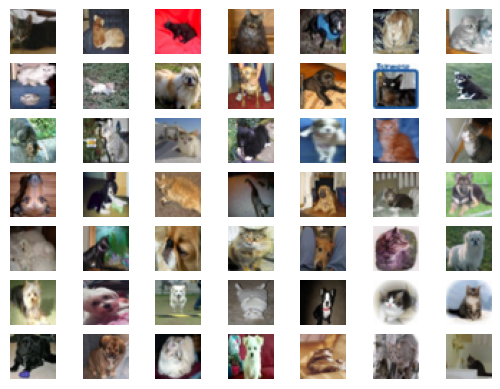

In [2]:
from keras.datasets import cifar10
from matplotlib import pyplot

# Load the dataset into memory
(trainX, trainy), (testX, testy) = cifar10.load_data()

# Filter images for categories 3 (cats) and 5 (dogs)
filtered_indices = (trainy.ravel() == 3) | (trainy.ravel() == 5)
trainX_filtered = trainX[filtered_indices]

# Plot images from the training set
for i in range(49):
    pyplot.subplot(7, 7, i + 1)  # Increment subplot index correctly
    pyplot.axis('off')  # Turn off the axis
    pyplot.imshow(trainX_filtered[i])
pyplot.show()

In [3]:
def load_real_samples():
    # load cifar10 dataset
    (trainX, trainy), (testX, testy) = load_data()

    # Take only cat image
    filtered_indices_train = (trainy.ravel() == 3) | (trainy.ravel() == 5)
    filtered_indices_test = (testy.ravel() == 3) | (testy.ravel() == 5)

    trainX = trainX[filtered_indices_train]
    testX = testX[filtered_indices_test]
    y_train = trainy[filtered_indices_train]
    y_test = testy[filtered_indices_test]


    # covert from unsigned ints to floats
    X = trainX.astype('float32')
    #scale from [0,255] to [-1,1]
    X = (X - 127.5)/ 127.5
    test_X = testX.astype('float32')
    test_X = (test_X - 127.5)/ 127.5
    y = np.where(y_train == 3, 0, y_train)
    y = np.where(y == 5, 1, y)
    y_test = np.where(y_test == 3, 0, y_test)
    y_test = np.where(y_test == 5, 1, y_test)
    return X, y,test_X,y_test

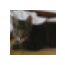

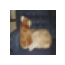

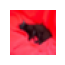

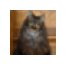

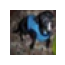

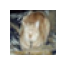

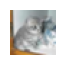

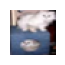

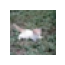

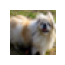

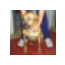

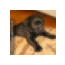

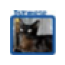

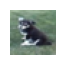

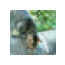

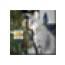

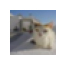

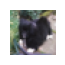

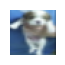

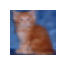

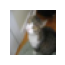

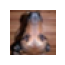

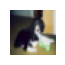

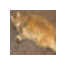

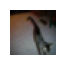

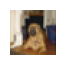

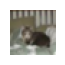

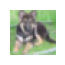

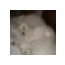

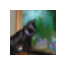

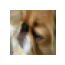

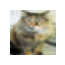

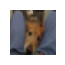

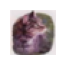

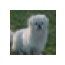

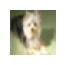

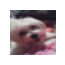

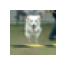

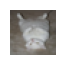

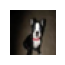

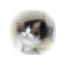

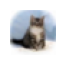

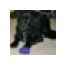

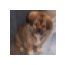

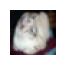

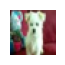

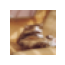

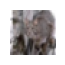

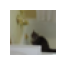

Metal device set to: Apple M1 Max


2024-05-08 13:34:42.571399: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-08 13:34:42.571513: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/anupamchaudhauri/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [4]:
from keras.datasets import cifar10
from matplotlib import pyplot

# Load the dataset into memory
(trainX, trainy), (testX, testy) = cifar10.load_data()

# Filter images for categories 3 (cats) and 5 (dogs)
filtered_indices = (trainy.ravel() == 3) | (trainy.ravel() == 5)
trainX_filtered = trainX[filtered_indices]

# Plot images from the training set
for i in range(49):
    pyplot.subplot(7, 7, i + 1)  # Increment subplot index correctly
    pyplot.axis('off')  # Turn off the axis
    pyplot.imshow(trainX_filtered[i])
    pyplot.show()

from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.layers import Conv2DTranspose
from keras.layers import Reshape
from keras.utils import plot_model
from dadapy import Data
import numpy as np
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import PersistenceEntropy
from gtda.pipeline import make_pipeline
import os
from matplotlib import pyplot
from tensorflow.keras.preprocessing.image import img_to_array

#from keras.preprocessing.image import img_to_array, array_to_img


#import gudhi as gd

# define the standalone discrimantor model
def define_discriminator(in_shape = (32,32,3)):
    model = Sequential()
    #normal
    model.add(Conv2D(64, (3,3), padding = 'same', input_shape = in_shape))
    model.add(LeakyReLU(alpha = 0.2))

    #downsample
    model.add(Conv2D(128, (3,3), strides=(2,2),padding = 'same'))
    model.add(LeakyReLU(alpha = 0.2))

    #downsample
    model.add(Conv2D(128,(3,3), strides=(2,2), padding = 'same'))
    model.add(LeakyReLU(alpha=0.2))

    #downsample
    model.add(Conv2D(256,(3,3), strides=(2,2), padding = 'same'))
    model.add(LeakyReLU(alpha=0.2))

    #classifier
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(4, activation = 'relu')) # doesn't matter what's here
    model.add(Dense(2, activation = 'relu')) # hidden layer (our approach only works for relus)
    model.add(Dense(1, activation = 'sigmoid')) # sigmoid as we want output to be a probability between 0-1

    #compile model
    opt = Adam(lr = 0.0002, beta_1 = 0.5)
    model.compile(loss="binary_crossentropy",optimizer = opt, metrics = ['accuracy'])
    return model

#define model
model = define_discriminator()
#model.summary()
#plot the model
#plot_model(model, to_file = 'discriminator_plot.png', show_shapes= True, show_layer_names = True)

# Now we want to train the Discriminator there is two type of data original and fake



In [5]:
X,y,test_X, y_test =  load_real_samples()


model.fit(X,y,batch_size = 64, epochs = 10,validation_data = (test_X, y_test))

Epoch 1/10


2024-05-08 13:34:43.083461: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-05-08 13:34:43.306969: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


157/157 [==============================] - ETA: 0s - loss: 0.6654 - accuracy: 0.6031

2024-05-08 13:34:46.288886: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


157/157 [==============================] - 3s 19ms/step - loss: 0.6654 - accuracy: 0.6031 - val_loss: 0.6429 - val_accuracy: 0.6370
Epoch 2/10
157/157 [==============================] - 3s 17ms/step - loss: 0.6325 - accuracy: 0.6445 - val_loss: 0.6319 - val_accuracy: 0.6495
Epoch 3/10
157/157 [==============================] - 3s 17ms/step - loss: 0.6083 - accuracy: 0.6695 - val_loss: 0.6018 - val_accuracy: 0.6895
Epoch 4/10
157/157 [==============================] - 3s 17ms/step - loss: 0.5854 - accuracy: 0.6867 - val_loss: 0.5808 - val_accuracy: 0.6905
Epoch 5/10
157/157 [==============================] - 3s 17ms/step - loss: 0.5631 - accuracy: 0.7027 - val_loss: 0.5633 - val_accuracy: 0.6980
Epoch 6/10
157/157 [==============================] - 3s 16ms/step - loss: 0.5431 - accuracy: 0.7151 - val_loss: 0.5619 - val_accuracy: 0.6990
Epoch 7/10
157/157 [==============================] - 3s 17ms/step - loss: 0.5237 - accuracy: 0.7299 - val_loss: 0.5819 - val_accuracy: 0.7000
Epoch 8/10

In [6]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         147584    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 256)         2

In [7]:
x = X

In [8]:
from keras import backend as K

# with a Sequential model
get_10th_layer_output = K.function([model.layers[0].input],
                                  [model.layers[10].output])
layer_output = get_10th_layer_output([x])[0]

In [9]:
layer_output.shape

(10000, 4)

In [10]:
weights_list1 = []
biases_list1 = []

# Iterate over the dense layers of the model
for layer in model.layers:
    # save all weights (including for the sigmoid layer)
    if isinstance(layer, Dense):
        weights, biases = layer.get_weights()
        weights_list1.append(weights)
        biases_list1.append(biases)

In [11]:
# ignore layer 0 because its dimensions are too large, start at layer 1 insted
weights_list1 = weights_list1[1:]
biases_list1 = biases_list1[1:]

In [12]:
len(weights_list1)

2

In [13]:
weights_list1[0].shape

(4, 2)

In [14]:
import numpy as np

def save_weights(weights_list, biases_list, fname='weights_and_biases'):
    weights_and_biases_dict = {f'weights_{i}': weights for i, weights in enumerate(weights_list)}
    weights_and_biases_dict.update({f'biases_{i}': biases for i, biases in enumerate(biases_list)})
    weights_and_biases_dict.update({'number_layers': len(weights_list)})

    np.savez(f'{fname}.npz', **weights_and_biases_dict)

# def load_weights(fname='weights_and_biases'):
#     loaded = np.load(f'{fname}.npz')
#     number_layers = loaded['number_layers']
#     weights_list = [loaded[f'weights_{i}'] for i in range(0, number_layers)]
#     biases_list = [loaded[f'biases_{i}'] for i in range(0, number_layers)]
#     return weights_list, biases_list

def save_data(test_x, test_y, fname='data'):
    data_dict = {'test_x': test_x, 'test_y': test_y}
    np.savez(f'{fname}.npz', **data_dict)

# def load_data(fname='data'):
#     loaded = np.load(f'{fname}.npz')
#     return loaded['test_x'], loaded['test_y']


In [15]:
save_weights(weights_list1, biases_list1, 'weights_and_biases_cifarcatdog')

In [16]:
save_data(layer_output, y_test,'data_cifarcatdog')